In [1]:
import numpy as np
import h5py

# with h5py.File('/home/agah/FontCase/fonts.hdf5','r') as hf:
with h5py.File('..\\fonts.hdf5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    data = hf.get('fonts')
    print(data)
    print(data.shape)
    imgC = data[43611,2,:,:]
    imgH = data[43611,7,:,:]
    
    smallDataSize = 10000

    As = data[:smallDataSize,0,:,:]
    Bs = data[:smallDataSize,1,:,:]
    
#     AllAs = data[:,0,:,:]
#     AllBs = data[:,1,:,:]

List of arrays in this file: 
 KeysView(<HDF5 file "fonts.hdf5" (mode r)>)
<HDF5 dataset "fonts": shape (56443, 62, 64, 64), type "|u1">
(56443, 62, 64, 64)


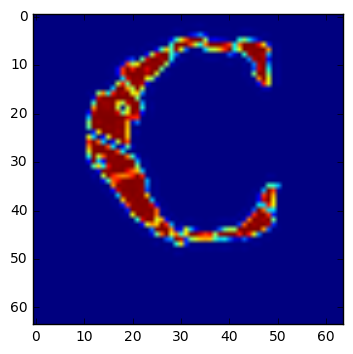

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(imgC)

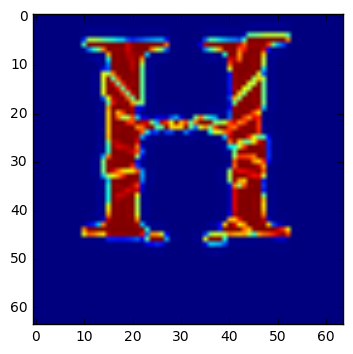

In [3]:
plt.imshow(imgH)

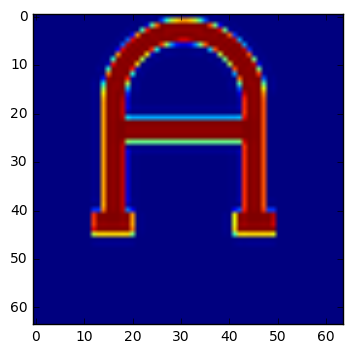

In [4]:
plt.imshow(As[0])

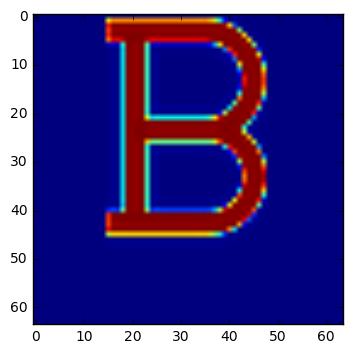

In [5]:
plt.imshow(Bs[0])

In [6]:
print(As.shape)
print(Bs.shape)

(10000, 64, 64)
(10000, 64, 64)


In [7]:
import numpy

def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = numpy.empty(a.shape, dtype=a.dtype)
    shuffled_b = numpy.empty(b.shape, dtype=b.dtype)
    permutation = numpy.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [8]:
As_reshaped = As.reshape((smallDataSize, 64*64))
print(As_reshaped.shape)

Bs_reshaped = Bs.reshape((smallDataSize, 64*64))
print(Bs_reshaped.shape)

As_reshaped, Bs_reshaped = shuffle_in_unison(As_reshaped, Bs_reshaped)


(10000, 4096)
(10000, 4096)


In [1]:
print(Bs_reshaped[0,:])

NameError: name 'Bs_reshaped' is not defined

In [9]:
training_size = (int)(smallDataSize * 0.90)
test_size = smallDataSize - training_size

print(training_size)
print(test_size)
print(training_size + test_size == smallDataSize)
As_reshaped_training = As_reshaped[:training_size, :]
Bs_reshaped_training = Bs_reshaped[:training_size, :]

As_reshaped_test = As_reshaped[training_size:, :]
Bs_reshaped_test = Bs_reshaped[training_size:, :]

print(As_reshaped_training.shape)
print(Bs_reshaped_training.shape)
print(As_reshaped_test.shape)
print(Bs_reshaped_test.shape)

9000
1000
True
(9000, 4096)
(9000, 4096)
(1000, 4096)
(1000, 4096)


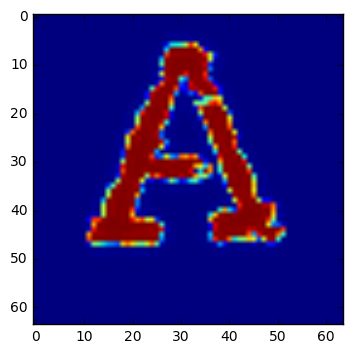

In [10]:
plt.imshow(As_reshaped_training[0,:].reshape((64,64)))

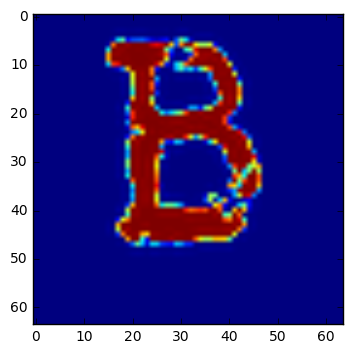

In [11]:
plt.imshow(Bs_reshaped_training[0,:].reshape((64,64)))

In [12]:
print(numpy.unique(As_reshaped_training[0,:]))

[  0   1   2   3   4   5   6   7   8   9  12  13  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  41  42  43  45  46  49  51  52  56  57  60  61  62  63  64  67  68
  70  71  72  74  75  76  77  80  81  82  85  87  88  89  90  91  93  94
  98 101 103 104 105 106 107 108 110 111 112 113 114 115 117 119 120 121
 122 124 126 128 130 132 133 134 135 136 137 139 140 141 143 144 145 146
 147 148 149 150 153 154 156 157 159 160 162 165 166 167 170 173 174 175
 177 178 179 181 184 185 186 187 190 191 192 193 195 197 198 200 201 203
 204 205 206 208 209 211 212 213 214 215 216 217 219 221 223 225 226 227
 228 229 231 232 233 234 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255]


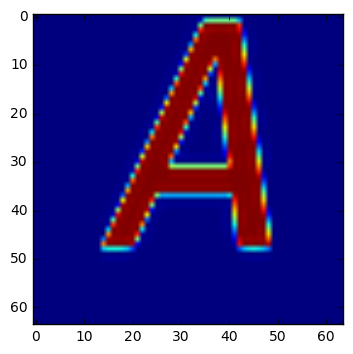

In [13]:
plt.imshow(As_reshaped_test[0,:].reshape((64,64)))

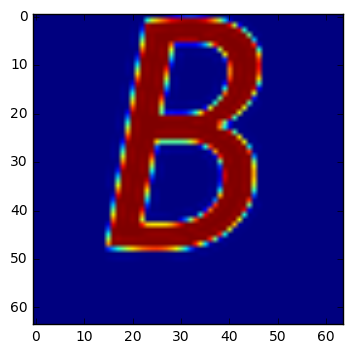

In [14]:
plt.imshow(Bs_reshaped_test[0,:].reshape((64,64)))

In [15]:
from sklearn import svm

import sklearn

class VectorRegression():
    def __init__(self):
        self.clf = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
                            kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

    def fit(self, X, y):
        n, m = y.shape
        # Fit a separate regressor for each column of y
        self.estimators_ = [sklearn.base.clone(self.clf).fit(X, y[:, i])
                               for i in range(m)]
        return self

    def predict(self, X):
        # Join regressors' predictions
        res = [est.predict(X)[:, np.newaxis] for est in self.estimators_]
        return np.hstack(res)
    
class SingleVectorRegression():
    def __init__(self):
        self.clf = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
                            kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

    def fit(self, X, y):
        n = y.shape
        # Fit a separate regressor for each column of y
        self.estimator = self.clf.fit(X, y)
        return self

    def predict(self, X):
        # Join regressors' predictions
        res = self.estimator.predict(X)
        return np.hstack(res)
    
class SingleClassifi():
    def __init__(self):
        self.clf = svm.SVD(C=300, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
                            kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

    def fit(self, X, y):
        n = y.shape
        # Fit a separate regressor for each column of y
        self.estimator = self.clf.fit(X, y)
        return self

    def predict(self, X):
        # Join regressors' predictions
        res = self.estimator.predict(X)
        return np.hstack(res)

In [16]:
import pickle

def processBit(bitIndex, keepModel = True, reportTwo = True):

    vr = SingleVectorRegression()
    model = vr.fit(As_reshaped_training, Bs_reshaped_training[:,bitIndex]) 
    
    if keepModel:
        output = open('data{0}.pkl'.format(bitIndex), 'wb')
        pickle.dump(model, output)
        output.close()
    
    pred = vr.predict(As_reshaped_test)
    predList = [int(v) for v in pred]
    result = (predList == Bs_reshaped_test[:,bitIndex])

    falseList = filter(lambda x:  not x, result)
    trueList = filter(lambda x: x, result)

    falseCount = len(list(falseList))
    correctCount = len(list(trueList))

    assert(falseCount + correctCount == test_size)
    errorRate = falseCount * 1.0 / test_size
    correctRate = correctCount * 1.0 / test_size

    if reportTwo:
        print("Bit {1}, error rate: {0}".format(errorRate * 100.00, bitIndex))
        print("Bit {1}, Correct rate: {0}".format(correctRate * 100.00, bitIndex))

    return errorRate


In [17]:
%%time
processBit(600)

Bit 600, error rate: 99.9
Bit 600, Correct rate: 0.1
Wall time: 8min 22s


0.999

In [18]:
%%time
processBit(0)

Bit 0, error rate: 1.0
Bit 0, Correct rate: 99.0
Wall time: 24min 44s


0.01

In [19]:
%%time
processBit(1024)

Bit 1024, error rate: 1.7000000000000002
Bit 1024, Correct rate: 98.3
Wall time: 24min 11s


0.017

In [20]:
%%time
processBit(2048)

Bit 2048, error rate: 2.3
Bit 2048, Correct rate: 97.7
Wall time: 24min 23s


0.023

In [21]:
%%time
processBit(3000)

Bit 3000, error rate: 4.1000000000000005
Bit 3000, Correct rate: 95.89999999999999
Wall time: 25min 45s


0.041

In [22]:
%%time
processBit(4095)

Bit 4095, error rate: 0.2
Bit 4095, Correct rate: 99.8
Wall time: 14min


0.002

In [23]:
%%time

iteration = 4096
erates = np.zeros(iteration)
for bi in range(iteration):
    erates[bi] = processBit(bi, False, False) * 100
    if bi % 100 == 0:
        print(bi, erates[bi])

0 1.0


KeyboardInterrupt: 

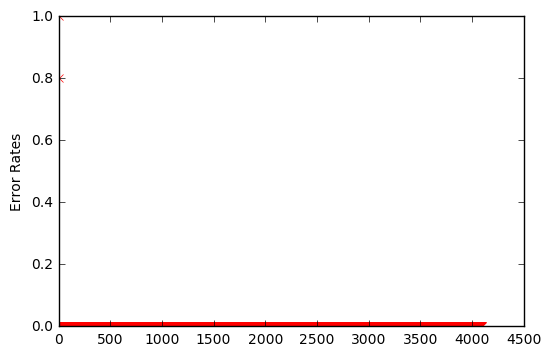

In [24]:
import matplotlib.pyplot as plt
plt.plot(erates, 'rx')
plt.ylabel('Error Rates')
plt.show()

In [25]:
np.set_printoptions(threshold=np.inf)
print(erates)

[ 1.   0.8  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0. 

SVD

In [26]:
# %%time

# print(AllAs.shape)
# print(AllBs.shape)

# AllAs_reshaped = AllAs.reshape(((AllAs.shape)[0], 64*64))
# print(AllAs_reshaped.shape)

# AllBs_reshaped = AllBs.reshape(((AllBs.shape)[0], 64*64))
# print(AllBs_reshaped.shape)


In [27]:
# def doPCA(data, components):
#     from sklearn.decomposition import PCA
#     pca = PCA(n_components=components)
#     pca.fit(data)
#     return pca

In [28]:
# pca = doPCA(AllAs_reshaped, 1024)
# print(pca.explained_variance_ratio_)

In [29]:
# first_pca = pca.components_[0]
# second_pca = pca.components_[1]

# print(first_pca.shape)

In [30]:
# transformed_As = pca.transform(AllAs_reshaped)
# print(transformed_As.shape)

In [31]:
# print(As_U.shape)
# print(As_s.shape)
# print(As_V.shape)

# k = 1024
# As_S = np.diag(As_s[:k])
# As_reconst = np.dot(As_U[:,:k], np.dot(As_S, As_V))print(As_reconst.shape)

In [32]:
# As_U, As_s, As_V = np.linalg.svd(AllAs_reshaped, full_matrices=False)

Clustering

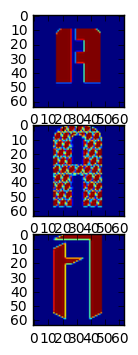

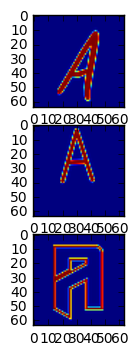

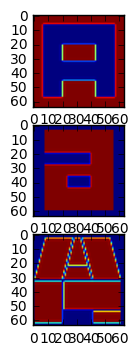

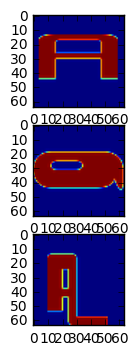

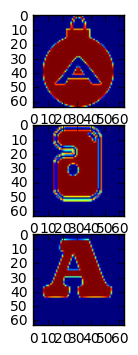

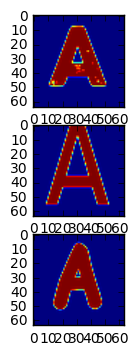

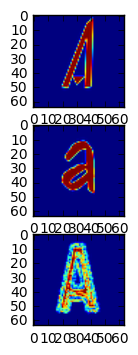

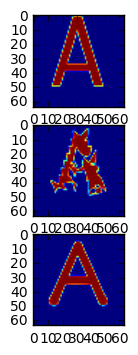

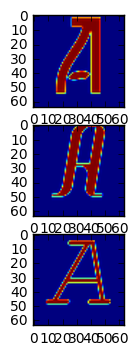

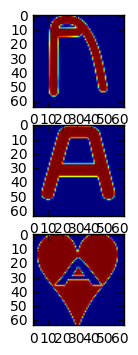

In [33]:
from sklearn.cluster import KMeans
import numpy as np
import random

def clusterAndRepresent(numberOfCluster, data, imageCount):
    kmeans = KMeans(n_clusters=numberOfCluster, random_state=0).fit(data)
    for i in range(numberOfCluster):
        inds = np.where(kmeans.labels_ == i)[0].tolist()
        randInds = random.sample(inds, imageCount)
        _, axarr = plt.subplots(imageCount)
        counter = 0
        for j in randInds:
            img = data[j,:].reshape((64,64))
            axarr[counter].imshow(img)
            counter += 1

    plt.show()
#     print(kmeans.cluster_centers_)
    
clusterAndRepresent(10, As_reshaped_training, 3)
# print(kmeans.labels_)
# kmeans.predict(Bs_reshaped_test[:,0])
# array([0, 1], dtype=int32)
# >>> kmeans.cluster_centers_

Hierarchical Clustering

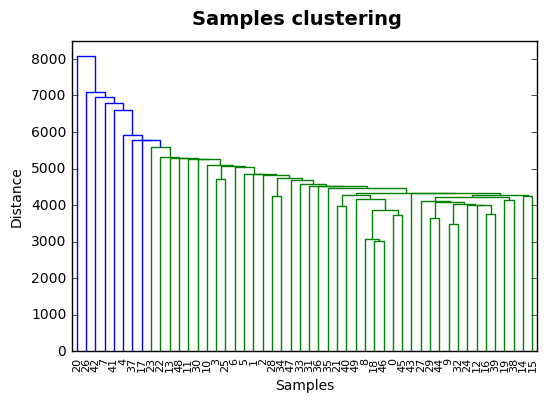

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

data_dist = pdist(As_reshaped_training[:50]) # computing the distance
data_link = linkage(data_dist) # computing the linkage

dendrogram(data_link,labels=data.dtype.names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);

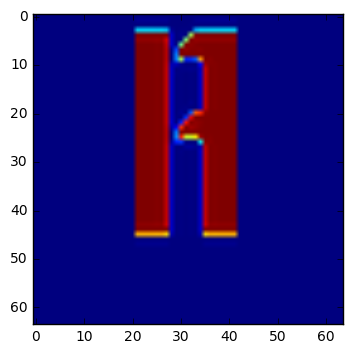

In [35]:
plt.imshow(As_reshaped_training[1,:].reshape((64,64)))

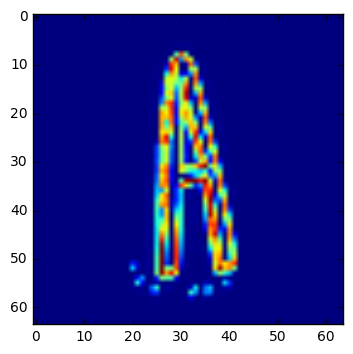

In [36]:
plt.imshow(As_reshaped_training[16,:].reshape((64,64)))

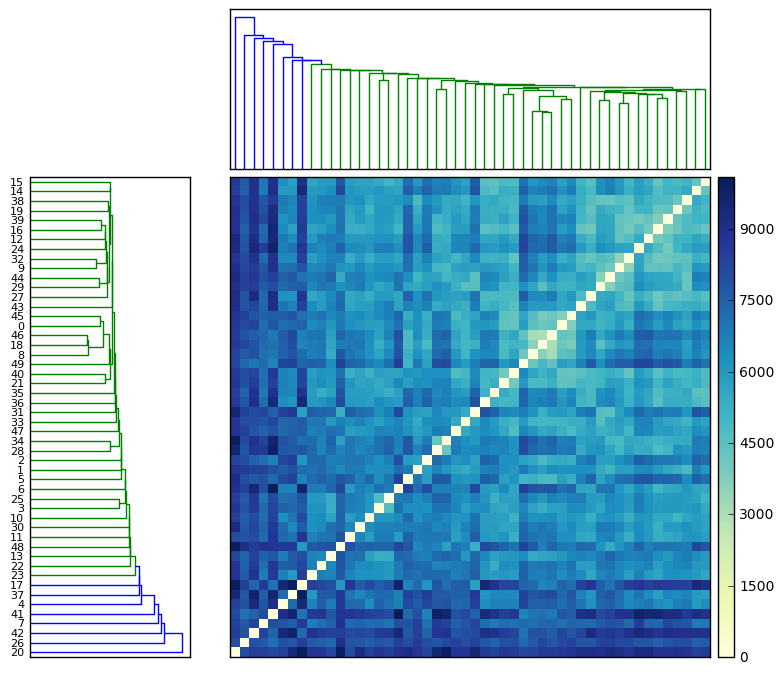

In [37]:
#First dendrogram.
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='single')
Z1 = dendrogram(Y, orientation='right',labels=data.dtype.names)
ax1.set_xticks([])

#Second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)